In [1]:
!pip install scikit-learn

You should consider upgrading via the 'D:\an-001-master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


d:\an-001-master\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\an-001-master\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


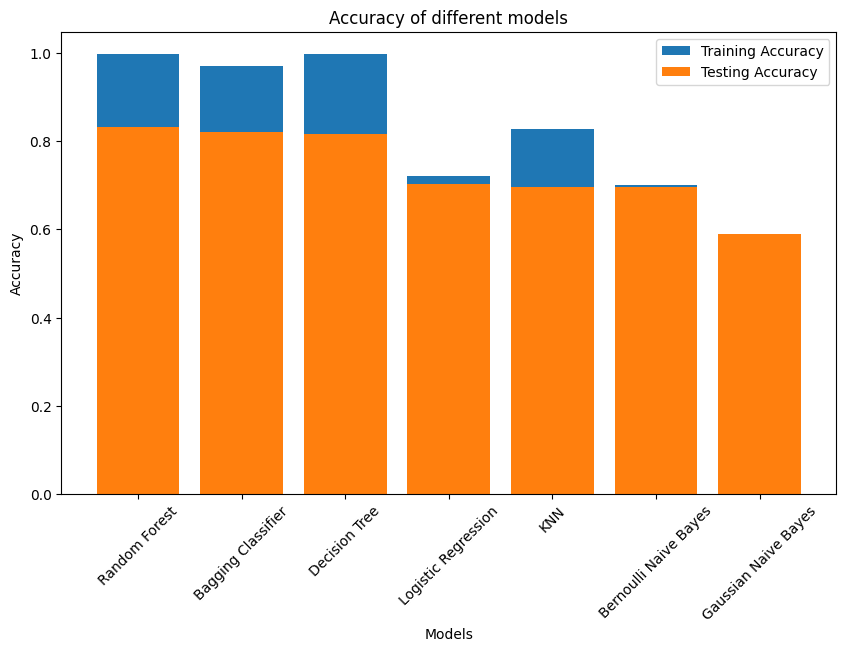

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from joblib import dump

# Load the data
df = pd.read_csv("./data/processed.csv")

# Let's assume 'is_success' is the target variable
y = df["is_success"]
X = df.drop(columns=["is_success", "product_id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models_list = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    # ("LightGBM", LGBMClassifier(random_state=42)),
    # ("Support Vector Machines", SVC(random_state=42)),
    # ("XGBoost", XGBClassifier(random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Bernoulli Naive Bayes", BernoulliNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier())),
]

result = pd.DataFrame(columns=["Model", "Training Accuracy", "Testing Accuracy"])

for name, model in models_list:
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_score = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(X_test)
    test_score = accuracy_score(y_test, test_predictions)

    new_row = {
        "Model": name,
        "Training Accuracy": train_score,
        "Testing Accuracy": test_score,
    }
    result.loc[len(result)] = new_row

result = result.sort_values(
    by=["Testing Accuracy", "Training Accuracy"], ascending=False
)

plt.figure(figsize=(10, 6))
plt.bar(result["Model"], result["Training Accuracy"], label="Training Accuracy")
plt.bar(result["Model"], result["Testing Accuracy"], label="Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:
result

,Model,Training Accuracy,Testing Accuracy
1,Random Forest,0.998507,0.833333
6,Bagging Classifier,0.971642,0.821429
5,Decision Tree,0.998507,0.815476
0,Logistic Regression,0.722388,0.702381
4,KNN,0.826866,0.696429
3,Bernoulli Naive Bayes,0.700000,0.696429
2,Gaussian Naive Bayes,0.585075,0.589286


In [4]:
random_forest_model = models_list[0][1]  # Get the Random Forest model object ONLY
file_name = "./models/random_forest.joblib"
dump(random_forest_model, file_name)

['./models/random_forest.joblib']

In [5]:
X_train.head(), y_train.head()

(       mrp  os  hard_disk_type  ram_memory  processor_brand  processor_count   
 770  64990   5               2          16                2               12  \
 748  64255   4               2           4                2                2   
 828  65790   4               2           8                0                6   
 666  64990   5               2           8                2                8   
 703  48400   3               0           8                2                1   
 
      display_type  form_factor  screen_res_w  screen_res_h  length  width   
 770             3            9          1920          1080   48.50  29.50  \
 748             3            4          1366           768   33.58  23.29   
 828             3            9          1920          1080   31.90  21.00   
 666             3            9          1920          1200   48.79  31.10   
 703             3            4          1920          1080   32.80  22.30   
 
      height   weight  hard_drive_size_val